# Music Genre Classification and Information Retrieval  

In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras

## Generating Training Data

This will be generating 4 data files with different variables, derived from raw audio.
1. baseline set - some various fetures averaged together to compare to later test
2. chroma frequency bins - this set will consist of only N chroma bins , averaged
3. MFCC - only N mfcc's averaged
4. MEl frequency bins - only N mel frequency bins averaged

In [18]:
#define mesurements
n_fft = 2048
hop_len = 512

In [2]:
def generate_baseline_data():
    header = 'filename spectral_centroid spectral_bandwidth spectral_contrast rolloff zero_crossing_rate rmse'
    header += ' label'
    header = header.split()

    file = open('base_data.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    genres = [name for name in os.listdir('genres') if os.path.isdir(os.path.join('genres', name)) ]
    for g in genres:
        for f in os.listdir(f'./genres/{g}'):
            song = f'./genres/{g}/{f}'
            y, sr = librosa.load(song, mono=True, duration=30)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr,n_fft=n_fft,hop_length=hop_len)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr,n_fft=n_fft,hop_length=hop_len)
            spec_con = librosa.feature.spectral_contrast((y=y, sr=sr,n_fft=n_fft,hop_length=hop_len)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr,n_fft=n_fft,hop_length=hop_len)
            zcr = librosa.feature.zero_crossing_rate(y)
            rmse = librosa.feature.rms(y)
            to_append = f'{f} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(spec_con)} {np.mean(rolloff)} {np.mean(zcr)} {np.mean(rmse)} {g}'   
            file = open('base_data.csv', 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())
    file.close()
    

In [14]:
def generate_chroma_data(n_chroma):
    header = 'filename'
    for i in range(1, n_chroma+1):
        header += f' chroma{i}'
    header += ' label'
    header = header.split()
    file_n = 'chroma_data_'+str(n_chroma)+'.csv'
    file = open(file_n, 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    genres = [name for name in os.listdir('genres') if os.path.isdir(os.path.join('genres', name)) ]
    for g in genres:
        for filename in os.listdir(f'./genres/{g}'):
            songname = f'./genres/{g}/{filename}'
            y, sr = librosa.load(songname, mono=True, duration=30)
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=n_chroma,n_fft=n_fft,hop_length=hop_len)
            to_append = f'{filename} '    
            
            for c in chroma_stft:
                to_append += f' {np.mean(c)}'
            to_append += f' {g}'
            file = open(file_n, 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())
    file.close()

In [15]:
def generate_mfcc_data(n_mfcc):
    header = 'filename'
    for i in range(1, n_mfcc+1):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    file_n = 'mfcc_data_'+str(n_mfcc)+'.csv'
    file = open(file_n, 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    genres = [name for name in os.listdir('genres') if os.path.isdir(os.path.join('genres', name)) ]
    for g in genres:
        for filename in os.listdir(f'./genres/{g}'):
            songname = f'./genres/{g}/{filename}'
            y, sr = librosa.load(songname, mono=True, duration=30)
            mfcc = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=n_mfcc,n_fft=n_fft,hop_length=hop_len)
            to_append = f'{filename} '    
            
            for c in mfcc:
                to_append += f' {np.mean(c)}'
            to_append += f' {g}'
            file = open(file_n, 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())
    file.close()

In [16]:
def generate_mel_data(n_mels):
    header = 'filename'
    for i in range(1, n_mels+1):
        header += f' mel{i}'
    header += ' label'
    header = header.split()
    file_n = 'mel_data_'+str(n_mels)+'.csv'
    file = open(file_n, 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    genres = [name for name in os.listdir('genres') if os.path.isdir(os.path.join('genres', name)) ]
    for g in genres:
        for filename in os.listdir(f'./genres/{g}'):
            songname = f'./genres/{g}/{filename}'
            y, sr = librosa.load(songname, mono=True, duration=30)
            mels = librosa.feature.melspectrogram(y=y, sr=sr,n_mels=n_mels,n_fft=n_fft,hop_length=hop_len)
            to_append = f'{filename} '    
            
            for c in mels:
                to_append += f' {np.mean(c)}'
            to_append += f' {g}'
            file = open(file_n, 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())
    file.close()

In [6]:
generate_baseline_data()
generate_chroma_data(12)
generate_mfcc_data(12)
generate_mel_data(12)

# Training With Base Line Data

In [2]:
'''
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
'''

data = pd.read_csv('base_data.csv')
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
scaler = StandardScaler()
x = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3) #this also shuffles

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 11,434
Trainable params: 11,434
Non-trainable params: 0
_________________________________________________________________


I am saving the model before training so that it can be reloaded with empty weights before each training session.
I will be running 3 rounds of test for each data set at different epochs, 10, 15 and 20

In [4]:
model.save_weights('blank_model.h5') #save empty weights to load and retrain

EPOCHS = 10
BATCH_SIZE = 100

H1 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 15
H2 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 20
H3 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 0s 16ms/step - loss: 2.2589 - sparse_categorical_accuracy: 0.1157 - val_loss: 2.2175 - val_sparse_categorical_accuracy: 0.1700
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1717 - sparse_categorical_accuracy: 0.2114 - val_loss: 2.1574 - val_sparse_categorical_accuracy: 0.1733
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.0982 - sparse_categorical_accuracy: 0.2171 - val_loss: 2.0954 - val_sparse_categorical_accuracy: 0.1767
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 2.0296 - sparse_categorical_accuracy: 0.2186 - val_loss: 2.0381 - val_sparse_categorical_accuracy: 0.1933
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 1.9616 - sparse_categorical_accuracy: 0.2514 - val_loss: 1.9833 - val_sparse_categorical_accuracy: 0.2433
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 1.9049 - sparse_categorical_accuracy: 0.3243 - va

# Training with Chroma Frequencies

In [5]:
data = pd.read_csv('chroma_data_12.csv')
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
scaler = StandardScaler()
x = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3) #this also shuffles

In [6]:
keras.backend.clear_session()
model = models.Sequential()

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.save_weights('blank_model.h5')
EPOCHS=10
H4 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 15
H5 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 20
H6 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 0s 31ms/step - loss: 2.2832 - sparse_categorical_accuracy: 0.0914 - val_loss: 2.2301 - val_sparse_categorical_accuracy: 0.1867
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1857 - sparse_categorical_accuracy: 0.2357 - val_loss: 2.1494 - val_sparse_categorical_accuracy: 0.2500
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1046 - sparse_categorical_accuracy: 0.2757 - val_loss: 2.0768 - val_sparse_categorical_accuracy: 0.2267
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 2.0216 - sparse_categorical_accuracy: 0.2643 - val_loss: 2.0110 - val_sparse_categorical_accuracy: 0.2367
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 1.9464 - sparse_categorical_accuracy: 0.2857 - val_loss: 1.9537 - val_sparse_categorical_accuracy: 0.2700
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 1.8835 - sparse_categorical_accuracy: 0.3086 - va

# Training With MFCC

In [7]:
data = pd.read_csv('mfcc_data_12.csv')
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
scaler = StandardScaler()
x = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3) #this also shuffles

In [8]:
keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.save_weights('blank_model.h5')
EPOCHS=10
H7 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 15
H8 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 20
H9 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 0s 13ms/step - loss: 2.2857 - sparse_categorical_accuracy: 0.1500 - val_loss: 2.2052 - val_sparse_categorical_accuracy: 0.2800
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1371 - sparse_categorical_accuracy: 0.3000 - val_loss: 2.1039 - val_sparse_categorical_accuracy: 0.2700
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.0240 - sparse_categorical_accuracy: 0.3114 - val_loss: 2.0098 - val_sparse_categorical_accuracy: 0.2833
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 1.9152 - sparse_categorical_accuracy: 0.3200 - val_loss: 1.9195 - val_sparse_categorical_accuracy: 0.2933
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 1.8199 - sparse_categorical_accuracy: 0.3400 - val_loss: 1.8243 - val_sparse_categorical_accuracy: 0.3067
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 1.7231 - sparse_categorical_accuracy: 0.3671 - va

# Training With Mel Data

In [9]:
data = pd.read_csv('mel_data_12.csv')
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
scaler = StandardScaler()
x = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3) #this also shuffles

In [10]:
keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.save_weights('blank_model.h5')
EPOCHS = 10
H10 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 15
H11 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 20
H12 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 0s 13ms/step - loss: 2.2856 - sparse_categorical_accuracy: 0.1086 - val_loss: 2.2344 - val_sparse_categorical_accuracy: 0.1467
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2365 - sparse_categorical_accuracy: 0.1871 - val_loss: 2.1950 - val_sparse_categorical_accuracy: 0.2233
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1954 - sparse_categorical_accuracy: 0.2229 - val_loss: 2.1481 - val_sparse_categorical_accuracy: 0.2367
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1483 - sparse_categorical_accuracy: 0.2371 - val_loss: 2.0945 - val_sparse_categorical_accuracy: 0.2667
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 2.0954 - sparse_categorical_accuracy: 0.2486 - val_loss: 2.0476 - val_sparse_categorical_accuracy: 0.2800
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 2.0389 - sparse_categorical_accuracy: 0.2643 - va

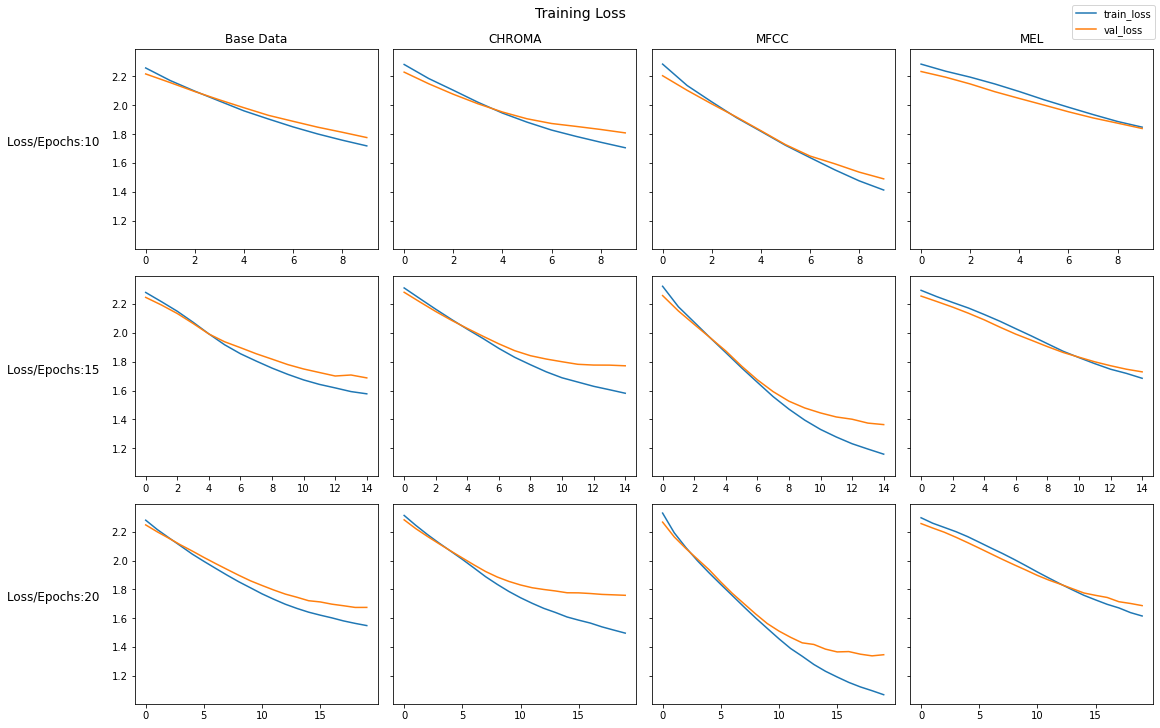

In [11]:
# set up plots
N1 = np.arange(0, 10) #10 epoch
N2 = np.arange(0, 15) #15 epoch
N3 = np.arange(0, 20) #20 epoch

cols = ['{}'.format(col) for col in ['Base Data', 'CHROMA', 'MFCC','MEL']]
rows = ['Loss/Epochs:{}                            '.format(row) for row in ['10', '15', '20']]

fig_l, axes_l = plt.subplots(3,4,figsize=(16, 10),sharex='row',sharey='all',constrained_layout=True) #loss graphs

for ax, col in zip(axes_l[0], cols):
    ax.set_title(col)

for ax, row in zip(axes_l[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

j=0

axes_l[0][j].plot(N1, H1.history["loss"], label="train_loss")
axes_l[0][j].plot(N1, H1.history["val_loss"], label="val_loss")

axes_l[1][j].plot(N2, H2.history["loss"], label="train_loss")
axes_l[1][j].plot(N2, H2.history["val_loss"], label="val_loss")

axes_l[2][j].plot(N3, H3.history["loss"], label="train_loss")
axes_l[2][j].plot(N3, H3.history["val_loss"], label="val_loss")

j = 1

axes_l[0][j].plot(N1, H4.history["loss"], label="train_loss")
axes_l[0][j].plot(N1, H4.history["val_loss"], label="val_loss")

axes_l[1][j].plot(N2, H5.history["loss"], label="train_loss")
axes_l[1][j].plot(N2, H5.history["val_loss"], label="val_loss")

axes_l[2][j].plot(N3, H6.history["loss"], label="train_loss")
axes_l[2][j].plot(N3, H6.history["val_loss"], label="val_loss")

j = 2

axes_l[0][j].plot(N1, H7.history["loss"], label="train_loss")
axes_l[0][j].plot(N1, H7.history["val_loss"], label="val_loss")

axes_l[1][j].plot(N2, H8.history["loss"], label="train_loss")
axes_l[1][j].plot(N2, H8.history["val_loss"], label="val_loss")

axes_l[2][j].plot(N3, H9.history["loss"], label="train_loss")
axes_l[2][j].plot(N3, H9.history["val_loss"], label="val_loss")

j = 3

axes_l[0][j].plot(N1, H10.history["loss"], label="train_loss")
axes_l[0][j].plot(N1, H10.history["val_loss"], label="val_loss")

axes_l[1][j].plot(N2, H11.history["loss"], label="train_loss")
axes_l[1][j].plot(N2, H11.history["val_loss"], label="val_loss")

axes_l[2][j].plot(N3, H12.history["loss"], label="train_loss")
axes_l[2][j].plot(N3, H12.history["val_loss"], label="val_loss")

fig_l.suptitle("Training Loss", fontsize=14)

lines = []
labels = []

for ax in fig_l.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    break

    
fig_l.legend(lines, labels,           
           loc = 'upper right')
plt.show()

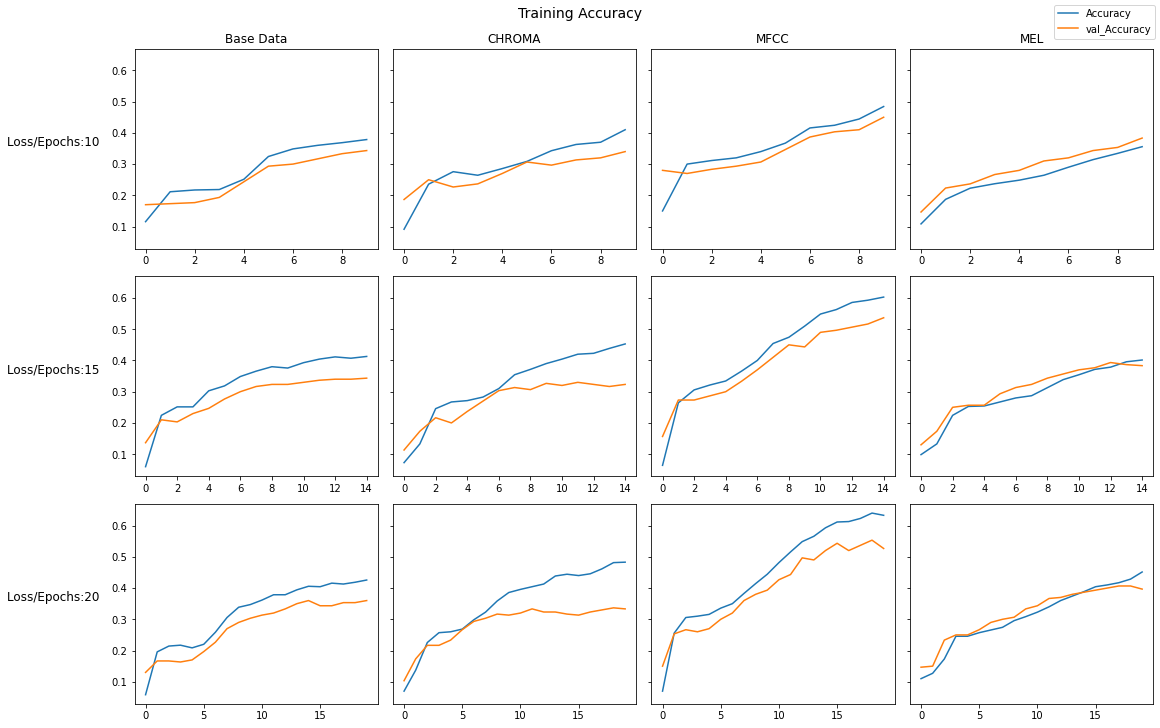

In [12]:

fig_a, axes_a = plt.subplots(3,4,figsize=(16, 10),sharex='row',sharey='all',constrained_layout=True) #loss graphs

for ax, col in zip(axes_a[0], cols):
    ax.set_title(col)

for ax, row in zip(axes_a[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

j=0

axes_a[0][j].plot(N1, H1.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[0][j].plot(N1, H1.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[1][j].plot(N2, H2.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[1][j].plot(N2, H2.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[2][j].plot(N3, H3.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[2][j].plot(N3, H3.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

j = 1

axes_a[0][j].plot(N1, H4.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[0][j].plot(N1, H4.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[1][j].plot(N2, H5.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[1][j].plot(N2, H5.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[2][j].plot(N3, H6.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[2][j].plot(N3, H6.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

j = 2

axes_a[0][j].plot(N1, H7.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[0][j].plot(N1, H7.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[1][j].plot(N2, H8.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[1][j].plot(N2, H8.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[2][j].plot(N3, H9.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[2][j].plot(N3, H9.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

j = 3

axes_a[0][j].plot(N1, H10.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[0][j].plot(N1, H10.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[1][j].plot(N2, H11.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[1][j].plot(N2, H11.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[2][j].plot(N3, H12.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[2][j].plot(N3, H12.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

fig_a.suptitle("Training Accuracy", fontsize=14)

lines = []
labels = []

for ax in fig_a.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    break

    
fig_a.legend(lines, labels,           
           loc = 'upper right')
plt.show()




## Conclusion
The baseline training appears to plateu pretty quickly, which expected due to the limited variables.
It appears that 12 chroma frequencies performs worse overall than the baseline, this might be due to the fact that 12 chroma filters are not capturing the most meaningful fetures. The mel frequencies perform just as well and just above the baseline, further they don't seem to plateu ,but have an odd learning curve ,with the larges gap between training and validation.
Training with the MFCC data yeilded the best accuracy and learning rate, quickly outperforming the others.

# Adding More Features

increasing features from 12 to 24 and repeating above

In [19]:
generate_chroma_data(24)
generate_mfcc_data(24)
generate_mel_data(24)

### Baseline

In [22]:
data = pd.read_csv('base_data.csv')
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
scaler = StandardScaler()
x = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3) #this also shuffles

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.save_weights('blank_model.h5') #save empty weights to load and retrain

EPOCHS = 10
BATCH_SIZE = 100

H1 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 15
H2 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 20
H3 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 0s 13ms/step - loss: 2.2907 - sparse_categorical_accuracy: 0.1114 - val_loss: 2.2404 - val_sparse_categorical_accuracy: 0.2167
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1928 - sparse_categorical_accuracy: 0.2429 - val_loss: 2.1609 - val_sparse_categorical_accuracy: 0.2100
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1112 - sparse_categorical_accuracy: 0.2686 - val_loss: 2.0871 - val_sparse_categorical_accuracy: 0.2167
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 2.0337 - sparse_categorical_accuracy: 0.2671 - val_loss: 2.0250 - val_sparse_categorical_accuracy: 0.2367
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 1.9632 - sparse_categorical_accuracy: 0.2629 - val_loss: 1.9682 - val_sparse_categorical_accuracy: 0.3000
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 1.9037 - sparse_categorical_accuracy: 0.3129 - va

### Chroma

In [24]:
data = pd.read_csv('chroma_data_24.csv')
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
scaler = StandardScaler()
x = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3) #this also shuffles

keras.backend.clear_session()
model = models.Sequential()

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.save_weights('blank_model.h5')
EPOCHS=10
H4 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 15
H5 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 20
H6 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 0s 13ms/step - loss: 2.2206 - sparse_categorical_accuracy: 0.1586 - val_loss: 2.1481 - val_sparse_categorical_accuracy: 0.2600
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.0778 - sparse_categorical_accuracy: 0.2586 - val_loss: 2.0524 - val_sparse_categorical_accuracy: 0.2600
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 1.9749 - sparse_categorical_accuracy: 0.2743 - val_loss: 1.9856 - val_sparse_categorical_accuracy: 0.2133
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 1.8900 - sparse_categorical_accuracy: 0.2729 - val_loss: 1.9293 - val_sparse_categorical_accuracy: 0.2500
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 1.8214 - sparse_categorical_accuracy: 0.3300 - val_loss: 1.8869 - val_sparse_categorical_accuracy: 0.2500
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 1.7641 - sparse_categorical_accuracy: 0.3529 - va

### MFCC

In [26]:
data = pd.read_csv('mfcc_data_24.csv')
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
scaler = StandardScaler()
x = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3) #this also shuffles

keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.save_weights('blank_model.h5')
EPOCHS=10
H7 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 15
H8 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 20
H9 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 0s 13ms/step - loss: 2.2536 - sparse_categorical_accuracy: 0.1529 - val_loss: 2.1865 - val_sparse_categorical_accuracy: 0.2000
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.0984 - sparse_categorical_accuracy: 0.2643 - val_loss: 2.0593 - val_sparse_categorical_accuracy: 0.3000
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 1.9549 - sparse_categorical_accuracy: 0.3771 - val_loss: 1.9260 - val_sparse_categorical_accuracy: 0.3667
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 1.8202 - sparse_categorical_accuracy: 0.3886 - val_loss: 1.7981 - val_sparse_categorical_accuracy: 0.3800
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 1.6803 - sparse_categorical_accuracy: 0.4057 - val_loss: 1.6850 - val_sparse_categorical_accuracy: 0.4100
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 1.5717 - sparse_categorical_accuracy: 0.4400 - va

### MEL

In [27]:
data = pd.read_csv('mel_data_24.csv')
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
scaler = StandardScaler()
x = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3) #this also shuffles

keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.save_weights('blank_model.h5')
EPOCHS = 10
H10 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 15
H11 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))
keras.backend.clear_session()
model.load_weights('blank_model.h5')
EPOCHS = 20
H12 = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 0s 13ms/step - loss: 2.2869 - sparse_categorical_accuracy: 0.1686 - val_loss: 2.2515 - val_sparse_categorical_accuracy: 0.1867
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2065 - sparse_categorical_accuracy: 0.2271 - val_loss: 2.1720 - val_sparse_categorical_accuracy: 0.2400
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1417 - sparse_categorical_accuracy: 0.2571 - val_loss: 2.1030 - val_sparse_categorical_accuracy: 0.2600
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 2.0805 - sparse_categorical_accuracy: 0.2871 - val_loss: 2.0400 - val_sparse_categorical_accuracy: 0.2933
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 2.0172 - sparse_categorical_accuracy: 0.3114 - val_loss: 1.9727 - val_sparse_categorical_accuracy: 0.3300
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 1.9504 - sparse_categorical_accuracy: 0.3314 - va

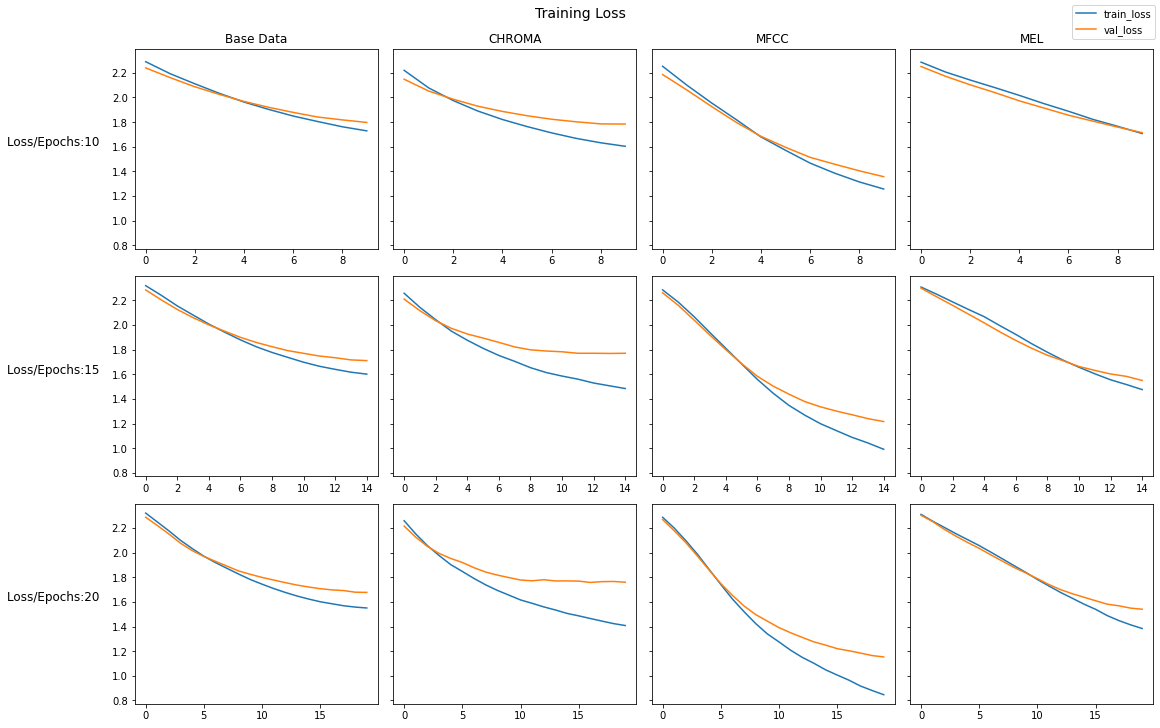

In [28]:
# set up plots
N1 = np.arange(0, 10) #10 epoch
N2 = np.arange(0, 15) #15 epoch
N3 = np.arange(0, 20) #20 epoch

cols = ['{}'.format(col) for col in ['Base Data', 'CHROMA', 'MFCC','MEL']]
rows = ['Loss/Epochs:{}                            '.format(row) for row in ['10', '15', '20']]

fig_l, axes_l = plt.subplots(3,4,figsize=(16, 10),sharex='row',sharey='all',constrained_layout=True) #loss graphs

for ax, col in zip(axes_l[0], cols):
    ax.set_title(col)

for ax, row in zip(axes_l[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

j=0

axes_l[0][j].plot(N1, H1.history["loss"], label="train_loss")
axes_l[0][j].plot(N1, H1.history["val_loss"], label="val_loss")

axes_l[1][j].plot(N2, H2.history["loss"], label="train_loss")
axes_l[1][j].plot(N2, H2.history["val_loss"], label="val_loss")

axes_l[2][j].plot(N3, H3.history["loss"], label="train_loss")
axes_l[2][j].plot(N3, H3.history["val_loss"], label="val_loss")

j = 1

axes_l[0][j].plot(N1, H4.history["loss"], label="train_loss")
axes_l[0][j].plot(N1, H4.history["val_loss"], label="val_loss")

axes_l[1][j].plot(N2, H5.history["loss"], label="train_loss")
axes_l[1][j].plot(N2, H5.history["val_loss"], label="val_loss")

axes_l[2][j].plot(N3, H6.history["loss"], label="train_loss")
axes_l[2][j].plot(N3, H6.history["val_loss"], label="val_loss")

j = 2

axes_l[0][j].plot(N1, H7.history["loss"], label="train_loss")
axes_l[0][j].plot(N1, H7.history["val_loss"], label="val_loss")

axes_l[1][j].plot(N2, H8.history["loss"], label="train_loss")
axes_l[1][j].plot(N2, H8.history["val_loss"], label="val_loss")

axes_l[2][j].plot(N3, H9.history["loss"], label="train_loss")
axes_l[2][j].plot(N3, H9.history["val_loss"], label="val_loss")

j = 3

axes_l[0][j].plot(N1, H10.history["loss"], label="train_loss")
axes_l[0][j].plot(N1, H10.history["val_loss"], label="val_loss")

axes_l[1][j].plot(N2, H11.history["loss"], label="train_loss")
axes_l[1][j].plot(N2, H11.history["val_loss"], label="val_loss")

axes_l[2][j].plot(N3, H12.history["loss"], label="train_loss")
axes_l[2][j].plot(N3, H12.history["val_loss"], label="val_loss")

fig_l.suptitle("Training Loss", fontsize=14)

lines = []
labels = []

for ax in fig_l.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    break

    
fig_l.legend(lines, labels,           
           loc = 'upper right')
plt.show()

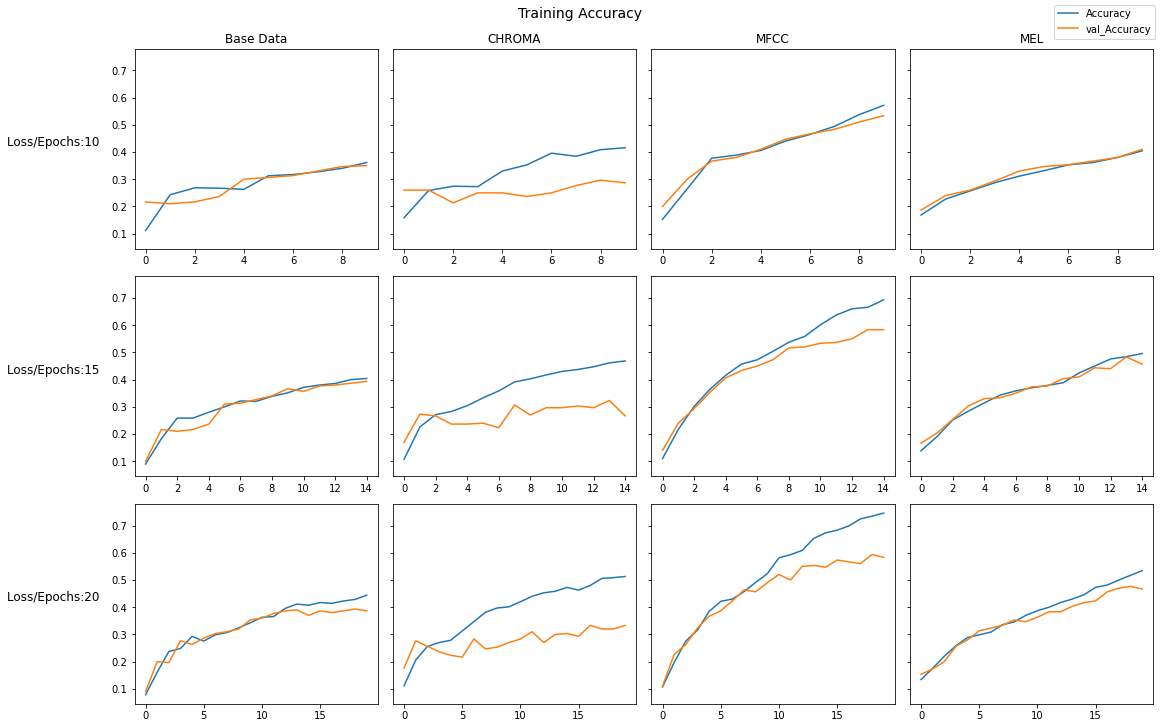

In [29]:

fig_a, axes_a = plt.subplots(3,4,figsize=(16, 10),sharex='row',sharey='all',constrained_layout=True) #loss graphs

for ax, col in zip(axes_a[0], cols):
    ax.set_title(col)

for ax, row in zip(axes_a[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

j=0

axes_a[0][j].plot(N1, H1.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[0][j].plot(N1, H1.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[1][j].plot(N2, H2.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[1][j].plot(N2, H2.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[2][j].plot(N3, H3.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[2][j].plot(N3, H3.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

j = 1

axes_a[0][j].plot(N1, H4.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[0][j].plot(N1, H4.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[1][j].plot(N2, H5.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[1][j].plot(N2, H5.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[2][j].plot(N3, H6.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[2][j].plot(N3, H6.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

j = 2

axes_a[0][j].plot(N1, H7.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[0][j].plot(N1, H7.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[1][j].plot(N2, H8.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[1][j].plot(N2, H8.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[2][j].plot(N3, H9.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[2][j].plot(N3, H9.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

j = 3

axes_a[0][j].plot(N1, H10.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[0][j].plot(N1, H10.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[1][j].plot(N2, H11.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[1][j].plot(N2, H11.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

axes_a[2][j].plot(N3, H12.history["sparse_categorical_accuracy"], label="Accuracy")
axes_a[2][j].plot(N3, H12.history["val_sparse_categorical_accuracy"], label="val_Accuracy")

fig_a.suptitle("Training Accuracy", fontsize=14)

lines = []
labels = []

for ax in fig_a.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    break

    
fig_a.legend(lines, labels,           
           loc = 'upper right')
plt.show()


